In [2]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

### 0. Line plot 

In [40]:
x = np.arange(0, 5, 0.1)
def square(x):
    return x**2

def cubic(x):
    return 5 * x**0.5

Plotly themes:
- 'ggplot2' 
- 'seaborn' 
- 'simple_white' 
- 'plotly'
- 'plotly_white' 
- 'plotly_dark' 
- 'presentation'
- 'xgridoff'
- 'ygridoff' 
- 'gridon' 

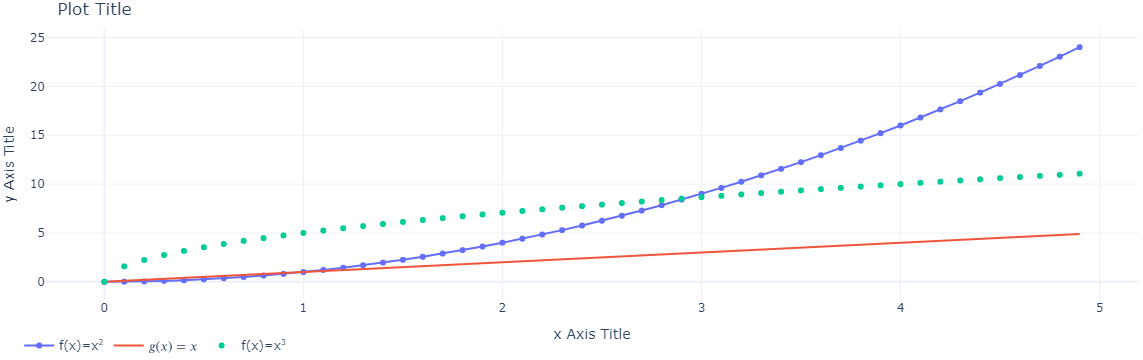

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=square(x), mode='lines+markers' , name='f(x)=x<sup>2</sup>')) # use <sup> because LATEX doens't work for hint
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.add_trace(go.Scatter(x=x, y=cubic(x), mode='markers' , name='f(x)=x<sup>3</sup>'))
fig.update_layout(legend_orientation="h", 
                  legend=dict(x=.1, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  template = 'plotly_white',
                  margin=dict(l=5, r=5, t=30, b=20) # by default 20 px
                 )
fig.show()